# Heading

In [22]:
!pip install pymysql
!pip install pandas

In [73]:
## Database Setup and Import :
## Database Connection :
import pymysql
connection=pymysql.connect(host='localhost',
                           user='root',
                           password='odinschool24',
                           database='crime_data')
connection

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
## Data Exploration:
## Retrieve basic statistics on the dataset, such as the total number of records and unique values in specific columns.
import pandas as pd
query= "select * from crime_data"
df=pd.read_sql(query,connection)
df

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


In [8]:
##Identify the distinct crime codes and their descriptions.
query="select distinct(crm_cd),crm_cd_desc from crime_data"
df=pd.read_sql(query,connection)
df

,crm_cd,crm_cd_desc
0,624,BATTERY - SIMPLE ASSAULT
1,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
3,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
4,946,OTHER MISCELLANEOUS CRIME
5,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
6,330,BURGLARY FROM VEHICLE
7,930,CRIMINAL THREATS - NO WEAPON DISPLAYED
8,648,ARSON
9,354,THEFT OF IDENTITY


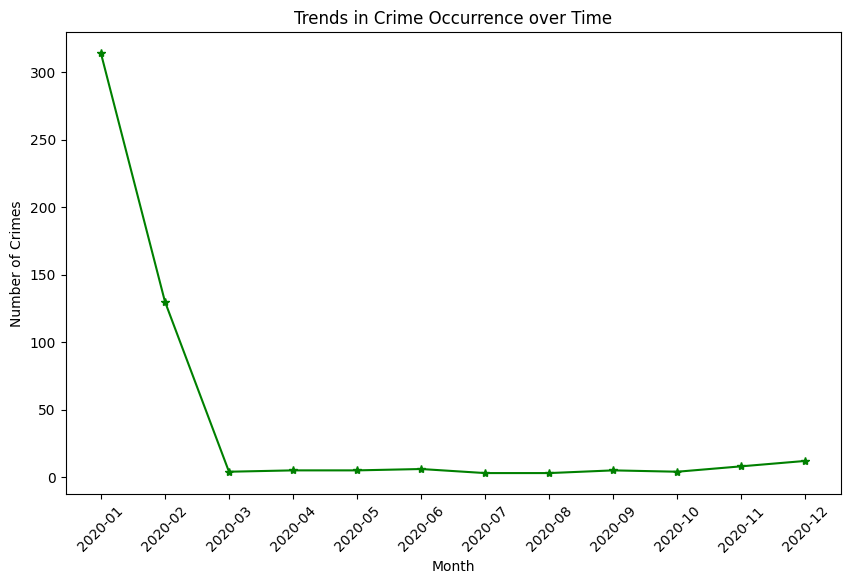

   crm_month  count
0    2020-01    314
1    2020-02    130
2    2020-03      4
3    2020-04      5
4    2020-05      5
5    2020-06      6
6    2020-07      3
7    2020-08      3
8    2020-09      5
9    2020-10      4
10   2020-11      8
11   2020-12     12


In [74]:
## Temporal Analysis:
## Analyze the temporal aspects of the data.
## Determine trends in crime occurrence over time

import matplotlib.pyplot as plt
query = """
select date_format(str_to_date(date_occ, '%m-%d-%Y'), '%Y-%m') as crm_month,
       COUNT(*) as count
from crime_data
group by crm_month
order by crm_month;
"""

df = pd.read_sql(query, connection)

plt.figure(figsize=(10, 6))
plt.plot(df['crm_month'], df['count'], marker='*', color='green')
plt.title('Trends in Crime Occurrence over Time')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()
print(df)


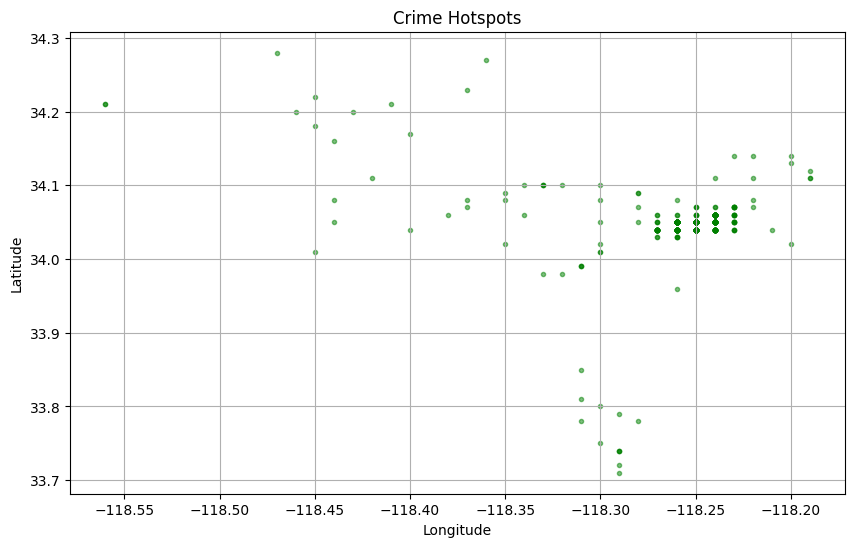

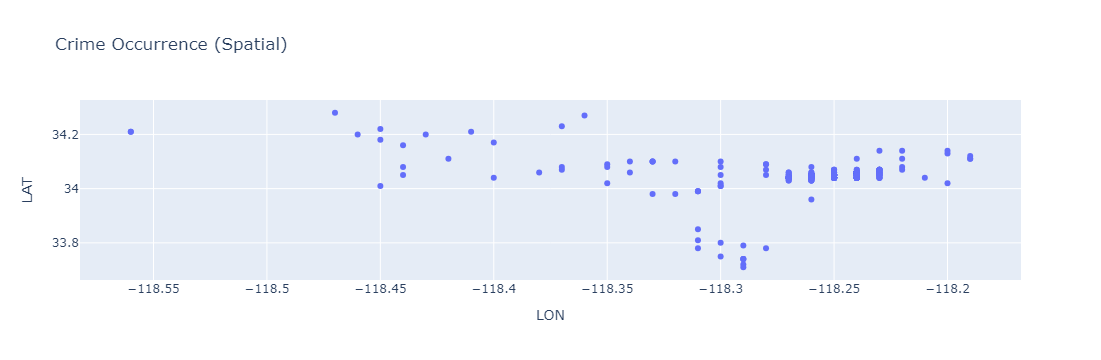

In [75]:
## Spatial Analysis:
## Utilize the geographical information (Latitude and Longitude) to perform spatial analysis.
import plotly.express as px
query = '''select LAT, LON from crime_data'''
df = pd.read_sql(query, connection)

plt.figure(figsize=(10, 6))
plt.scatter(df['LON'], df['LAT'], alpha=0.5, marker='.', color='green')
plt.title('Crime Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

fig = px.scatter(df, x='LON', y='LAT', title="Crime Occurrence (Spatial)")
fig.show()


In [12]:
## Visualize crime hotspots on a map.
import folium
from folium.plugins import HeatMap
import pandas as pd

query = '''select LAT, LON from crime_data'''
df = pd.read_sql(query, connection)

crime_map = folium.Map(location=[df['LAT'].mean(), df['LON'].mean()], zoom_start=10)

for _, row in df.iterrows():
    folium.Marker(location=[row['LAT'], row['LON']]).add_to(crime_map)

heatmap_data = [[row['LAT'], row['LON']] for _, row in df.iterrows()]
HeatMap(heatmap_data).add_to(crime_map)

crime_map.save('crime_map.html')
crime_map


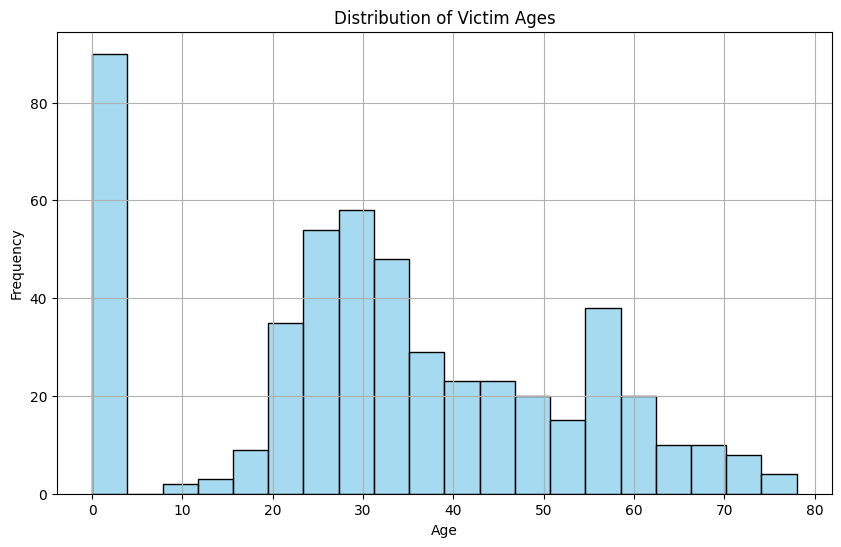

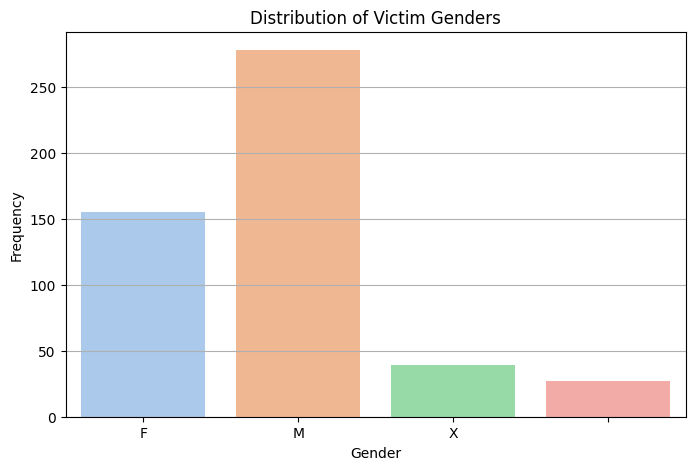

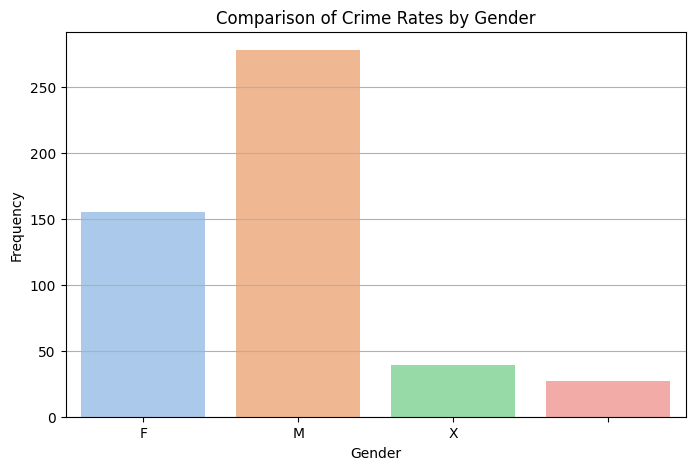

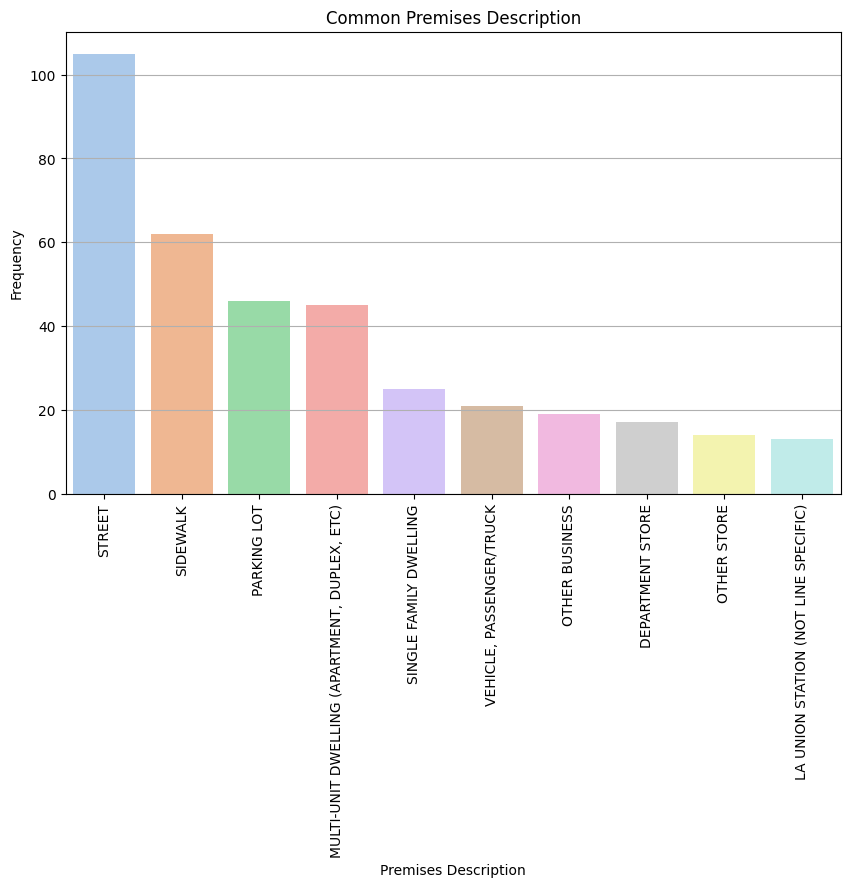

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
query = """select Vict_Age, Vict_Sex, Premis_Desc from crime_data"""
df= pd.read_sql(query, connection)
df.dropna(subset=['Vict_Age', 'Vict_Sex'], inplace=True)
##Investigate the distribution of victim ages.
##Distribution of Victiim Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Vict_Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##Investigate the distribution of victim  genders.
##Distribution of Victim Genders:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Vict_Sex', palette='pastel')
plt.title('Distribution of Victim Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

##Comparison of Crime Rates by Gender:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Vict_Sex', palette='pastel')
plt.title('Comparison of Crime Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

##Identify common premises descriptions where crimes occur.
##Identify Common Premises:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Premis_Desc', order=df['Premis_Desc'].value_counts().index[:10], palette='pastel')
plt.title('Common Premises Description')
plt.xlabel('Premises Description')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()



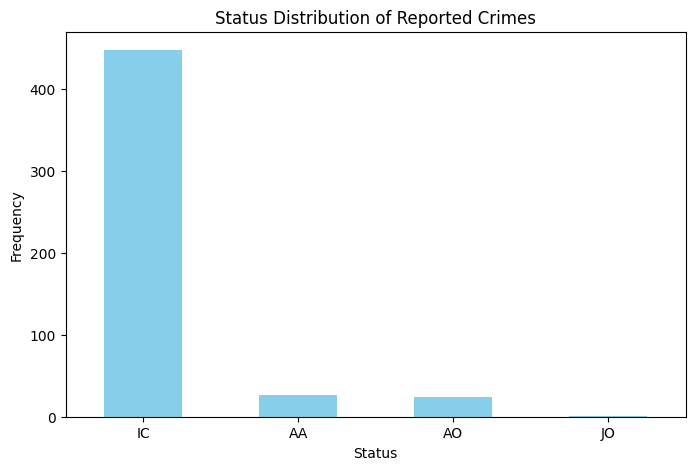

Status
IC    447
AA     27
AO     24
JO      1
Name: count, dtype: int64


In [82]:
## Status Analysis:
## Examine the status of reported crimes.
## Classify crimes based on their current status.
##What is the distribution of reported crimes based on Crime Code?
##Query to Retrieve Status Data:
query = "SELECT Status FROM crime_data"
status_data = pd.read_sql(query, connection)
status_counts = status_data['Status'].value_counts()

plt.figure(figsize=(8, 5))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Status Distribution of Reported Crimes')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Crm=df['Status']
status_count=Crm.value_counts()
print(status_count)


In [ ]:
##Spatial Analysis:
1>Where are the geographical hotspots for reported crimes?
Answer: The geographical hotspot for reported crimes is in Los Angeles, California, specifically between the latitude 34 degrees to 34.1 degrees and longitude -118.30 degrees to -118.20 degrees.

##Victim Demographics:
2>What is the distribution of victim ages in reported crimes?
Answer: Based on the analysis, the highest number of crime records is found in the age group 0 to 5 years.

3>Is there a significant difference in crime rates between male and female victims?
Answer: Yes, there is a significant difference in crime rates between male and female victims.
             Male victims have committed more crimes than female victims.
             The crime rate for males is 250, while for females it is slightly more than 150.

In [32]:
import pandas as pd

# Assuming df is your DataFrame, make sure it's loaded correctly
# For example, if you are loading from a CSV:
# df = pd.read_csv('your_file.csv')

# Check the first few rows of the DataFrame to ensure it's loaded correctly
print(df.head())

# Verify the column names to ensure 'Location' exists
print(df.columns)

# Now perform your operations
try:
    # Count the occurrences of each location
    location_counts = df['Location'].value_counts()

    # Get the top 5 most common locations
    top_locations = location_counts.head(5)

    print("Top 5 Most Common Locations for Reported Crimes:")
    print(top_locations)
except KeyError as e:
    print(f"Column not found: {e}")


   Vict_Age Vict_Sex                                   Premis_Desc
0        36        F                        SINGLE FAMILY DWELLING
1        25        M                                      SIDEWALK
2        76        F  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)
3        31        X                           BEAUTY SUPPLY STORE
4        23        M                              DEPARTMENT STORE
Index(['Vict_Age', 'Vict_Sex', 'Premis_Desc'], dtype='object')
Column not found: 'Location'


In [77]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\Data Science Course\Python\Capstone Project\crime_data.csv")

In [39]:
print(df)

         DR_NO   Date_Rptd    DATE_OCC    AREA_NAME  Crm_Cd  \
0     10304468  01-08-2020  01-08-2020    Southwest     624   
1    190101086  01-02-2020  01-01-2020      Central     624   
2    191501505  01-01-2020  01-01-2020  N Hollywood     745   
3    191921269  01-01-2020  01-01-2020      Mission     740   
4    200100502  01-02-2020  01-02-2020      Central     442   
..         ...         ...         ...          ...     ...   
494  200106614  02-07-2020  02-07-2020      Central     624   
495  200106615  02-07-2020  02-07-2020      Central     624   
496  200106616  02-07-2020  02-07-2020      Central     624   
497  200106617  02-07-2020  01-10-2020      Central     510   
498  200106618  02-07-2020  02-03-2020      Central     745   

                                           Crm_Cd_Desc  Vict_Age Vict_Sex  \
0                             BATTERY - SIMPLE ASSAULT        36        F   
1                             BATTERY - SIMPLE ASSAULT        25        M   
2           

In [43]:
##Spatial Analysis:
##'''4] Where do most crimes occur based on the Location column?'''
import pandas as pd

# Count the occurrences of each location
location_counts = df['Location'].value_counts()

# Get the top 10 most common locations
top_locations = location_counts.head(5)

print("Top 10 Most Common Locations for Reported Crimes:")
print(top_locations)

Top 10 Most Common Locations for Reported Crimes:
Location
800 N ALAMEDA ST      14
700 W 7TH ST          11
1100 S FIGUEROA ST     6
300 E 5TH ST           6
6TH                    6
Name: count, dtype: int64


In [52]:
##Crime Code Analysis:
##What is the distribution of reported crimes based on Crime Code?
code=df['Crm_Cd']
count_of_codes=code.value_counts()
print(count_of_codes)

Crm_Cd
330    82
624    74
440    44
442    28
510    28
341    26
230    24
740    23
745    23
888    19
310    16
210    12
480    11
354    10
420     9
350     9
930     7
623     5
761     5
662     5
946     4
220     4
648     3
901     3
850     2
956     2
351     2
320     2
625     2
886     2
900     2
755     1
649     1
940     1
647     1
890     1
421     1
820     1
812     1
920     1
666     1
343     1
Name: count, dtype: int64


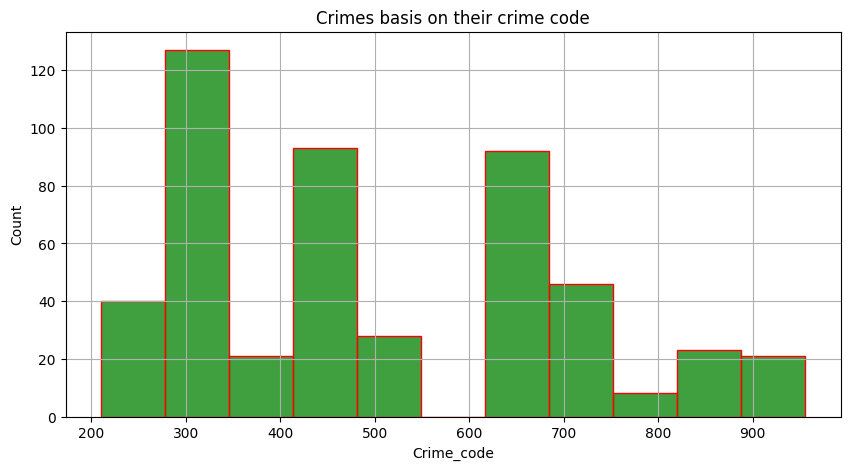

In [54]:
plt.figure(figsize=(10,5))
plt.style.use('default')
sns.histplot(df['Crm_Cd'],color='green',edgecolor='red')
plt.title('Crimes basis on their crime code')
plt.xlabel('Crime_code')
plt.grid()
plt.show()
             

In [55]:
##Investigation Based on Victim Ages

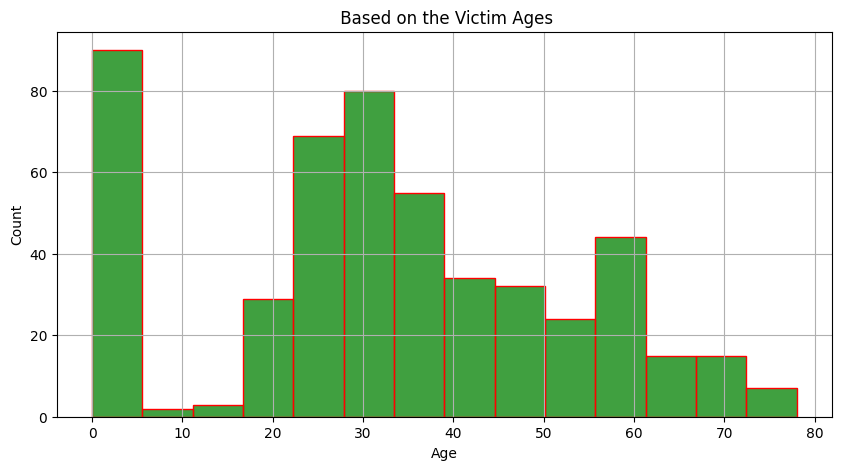

In [78]:
plt.figure(figsize=(10,5))
plt.style.use('default')
sns.histplot(df['Vict_Age'],color='green',edgecolor='red')
plt.title(' Based on the Victim Ages')
plt.xlabel('Age')
plt.grid()
plt.show()

In [57]:
##Distribution of Victim Genders

<Axes: xlabel='Vict_Sex', ylabel='count'>

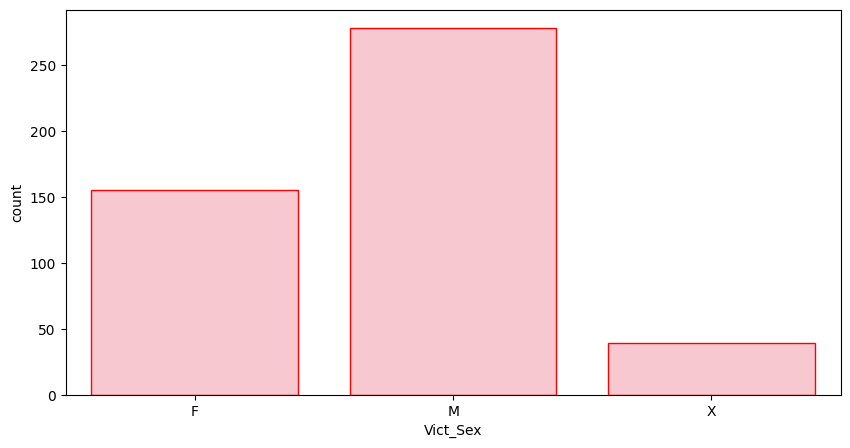

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Vict_Sex'],color='pink',edgecolor='red')

In [61]:
## Common Premises Description Where Crime Occure

In [62]:
pr=df['Premis_Desc']
cop=pr.value_counts()
print(cop)

Premis_Desc
STREET                                          105
SIDEWALK                                         62
PARKING LOT                                      46
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     45
SINGLE FAMILY DWELLING                           25
                                               ... 
MINI-MART                                         1
SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS      1
MEDICAL/DENTAL OFFICES                            1
DETENTION/JAIL FACILITY                           1
MTA PROPERTY OR PARKING LOT                       1
Name: count, Length: 67, dtype: int64


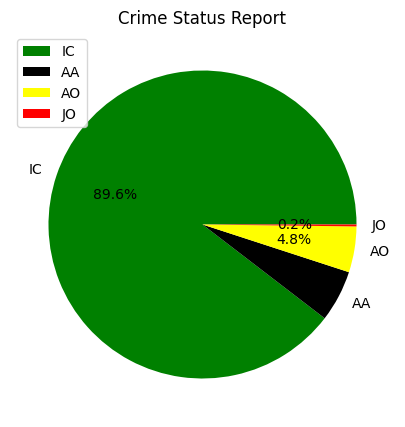

In [90]:
##Crime Status Report Using Pie Chart
plt.figure(figsize=(8, 5))
plt.pie(status_count,labels=status_count.index,autopct='%1.1f%%',colors=['green','black','yellow','red'])
plt.title('Crime Status Report') 
plt.legend()
plt.show()